### Decision Tree in Machine Learning
A decision treee is a supervised learning algorithm used for both **classification** and **regression** tasks. It has a hierarchical tree structure which consists of a root node, branches, internal nodes and leaf nodes. It works like a flowchart help to make decision step by step where:
- **Root Node**: Starting point representing the whole dataset.
- **Branches**: Lines connecting nodes showing the flow from one decision to another.
- **Internal Nodes**: Points where decision are made based on data features.
- **Leaf Nodes**: End points of the tree where the final decision or prediction is made.

A Decision Tree alse helps with decision-making by showing possible outcomes clearly. By looking at the "branches" we can quickly compare options and figure out the best choice.

There are mainly two types of Decision Trees based on the target variable:
1. **Classification Trees**: Used for predicting categorical outcomes like spam or not spam. These trees split the data based on features to classify data into predefined categories.
2. **Regression Trees**: Used for predicting continuous outcomes like predicting house prices. Instead of assigning categories, it provides numerical predictions based on the input features.

### How Decision Trees work?
1. **Start with the Root Node**: It begins with a main question at the root node which is derived from the dataset's features.
2. **Ask Yes/No Question**: From the root, the tree asks a series of yes/no question to split the data into subsets based on specific attributes.
3. **Branching Based on Answers**: Each question leads to different branches:
     - If the answer is yes, the tree follows one path.
     - If the answer is no, the tree follows another path.
4. **Continue Splitting**: This branching continues through further decisions helps in reducing the data down step-by-step.
5. **Reach the Leaf Node**: The process ends when there are no more useful question to ask leading to the leaf node where the final decision or prediction is made.

<img src="Images/Decision-Tree-Example.webp" width=600>

### Purity
#### What is Purity?
In decision trees, **purity** refers to how homogeneous (similar) the samples are within a node:
  - A pure node means all samples belong to the same class.
  - An impure node means samples are mixed across different classes.

Purity tell us **how well a split separates the data**. The goal of a good split is to make child nodes more pure than the parent.

#### Why is Purity important?
- Purity measyres help us decide which feature to split on.
- A good split reduces **uncertainty** about the class label.
- It ensures that the tree becomes more **informative** and less **chaotic** as it grows.

#### Measures of Impurity
1. **Entropy (ID3, C4.5)**
  $$
  Entropy(S) = - \sum_{i=1}^{k} p_{i} log_{2}(p_{i})
  $$
  - $p_{i}$ = proportion of samples of class i in node S.
  - **Meaning**: Entropy measures **disorder/uncertainty**.
    - High entropy $\rightarrow$ mixed classes (impure).
    - Low entropy $\rightarrow$ mostly one class (pure).
  
    Example:
   - Node has 50% A and 50% B $\rightarrow$ entropy = 1 (max uncertainty).
   - Node has 100% A $\rightarrow$ entropy = 0 (pure).

2. **Gini Index (CART)**
  $$
  Gini(S) = 1 - \sum_{i=1}^{k} p_{i}^{2}
  $$
  - $p_{i}$ = proportion of class i. 
  - **Meaning**: Probability that a randomly chosen sample is **misclassified** if labeled randomly according to the class distribution.
    - Low Gini $\rightarrow$ high purity.
  - Explain:
    Suppose you are at a node with a mixture of classes. If you **randomly assign a label** to a sample, the chance of being correct is:
    $$
    P(correct) = \sum_{i=1}^{k} p_{i}^{2}
    $$
    Because: if you pick class i with probability $p_{i}$, and the sample also belongs to class i (probability $p_{i}$), then the joint probability = $p_{i} \cdot p_{i} = p_{i}^{2}$. Summing over all classes gives the overall correctness probability.
    Thus:
    $$
    P(error) = 1 - \sum_{i=1}^{k} p_{i}^{2}
    $$
    That's exactly the **Gini Impurity**.
  - Example:
    - Pure node (100% one class): Gini = 0.
    - Mixed 50% A, 50% B $\rightarrow$ Gini = 0.5. 

3. **Information Gain (IG)**
  $$
  IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} Entropy(S_{v})
  $$
  - **Meaning**: IG measures how much entropy (uncertainty) is **reduced** when we split on a feature A.
  - The higher the IG, the "purer" the child nodes become.
  - The algorithm chooses the feature with the **highest IG** at each step.

4. **Variance Reduction / Mean Squared Error (Regression Trees)**
  
    **Variance**
    $$
    Var(S) = \frac{1}{|S|} \sum_{i=1}^{|S|} (y_{i} - \bar{y})^{2}
    $$ 
    - **Meaning**: Measures how spread out the target values are in a node.
    - A node is "pure" if all values are close to each other (low variance).

    **Variance Reduction (or MSE Reduction)**
    When splitting a dataset S into child nodes:
    $$
    VR(S, A) = Var(S) - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} Var(S_{v})
    $$
    - The split is chosen if it **reduces variance** the most.
    - Equivalent to minimizing **Mean Squared Error (MSE)** within each node.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

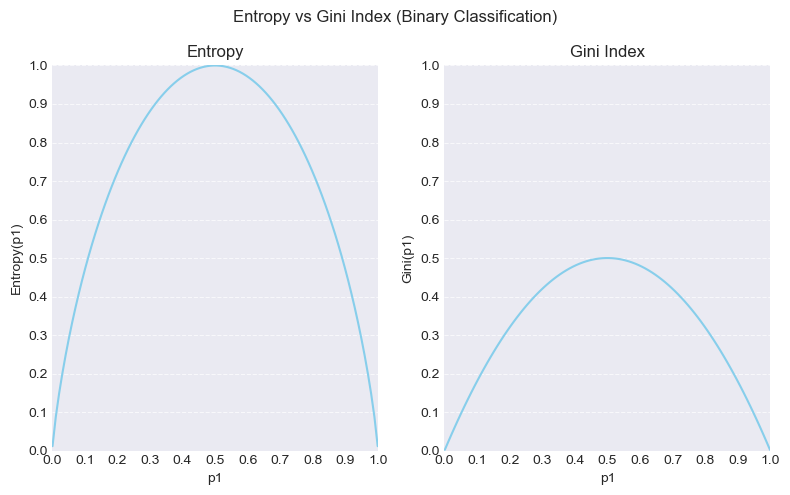

In [11]:
plt.style.use("seaborn-v0_8-dark")

X = np.linspace(0.001, 0.999, 100)
y_entropy = -X * np.log2(X) - (1 - X) * np.log2(1 - X)
y_gini = 1 - (X**2 + (1 - X)**2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
fig.suptitle("Entropy vs Gini Index (Binary Classification)")

axes[0].plot(X, y_entropy, color="skyblue")
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_yticks(np.arange(0, 1.1, 0.1))
axes[0].set_title("Entropy")
axes[0].set_xlabel("p1")
axes[0].set_ylabel("Entropy(p1)")
axes[0].grid(True, axis="y", linestyle="--", alpha=0.7)


axes[1].plot(X, y_gini, color="skyblue")
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
axes[1].set_yticks(np.arange(0, 1.1, 0.1))
axes[1].set_title("Gini Index")
axes[1].set_xlabel("p1")
axes[1].set_ylabel("Gini(p1)")
axes[1].grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show();

### Building Decision Tree
#### ID3 (Iterative Dichotomiser 3)
The ID3 algorithm is specifically designed for building decision trees from a given dataset. Its primary objective is to construct a tree that best explains the relationship between attributes in the data and their corresponding class labels.
1. **Selecting the Best Attribute**
  - ID3 employs the concept of **entropy** and **information gain** to determine the attribute that best separates the data. Entropy measures the impurity or randomness in the dataset.
    - **Entropy**: Measures the impurity of a set $S$.$$ Entropy(S) = - \sum_{i=1}^{k} p_{i} \log_{2}(p_{i})$$
      - $p_i$ is the proportion of samples belonging to class $i$ in node $S$.
      - Entropy = 0 indicates perfect purity (all samples belong to one class).
      - Entropy reaches its maximum when classes are perfectly mixed.
  - The algorithm calculates the entropy of each attribute and selects the one that results in the most significant information gain when used for splitting the data.
    - **Information Gain (IG)**: Measures the reduction in entropy achieved by splitting dataset $S$ on attribute $A$. $$  IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} Entropy(S_{v})$$
      - $Values(A)$ are the unique values of attribute $A$.
      - $S_v$ is the subset of $S$ where attribute $A$ has value $v$.
      - $\frac{|S_v|}{|S|}$ is the proportion of samples going into the branch for value $v$.
  - The attribute with the highest Information Gain is chosen for the split.
2. **Creating Tree Nodes**
  - The chosen attribute is used to split the dataset into subsets based on its distinct values.
  - **ID3 performs a multi-way split**, creating a new, separate branch for each unique value of the attribute.
  - For each subset, ID3 recurses to find the next best attribute to further partition the data, forming branches and new nodes accordingly.
3. **Stopping Criteria**
  - The recursion continues until one of the stopping criteria is met, such as when all instances in a branch belong to the same class or when all attributes have been used for splitting.

**Advantages**
  - **Interpretability**: Decision trees generated by ID3 are easily interpretable, making them suitable for explaining decisions to non-technical stakeholders.
  - **Handles Categorical Data**: ID3 can effectively handle categorical attributes without requiring explicit data preprocessing steps.
  - **Computationally Inexpensive**: The algorithm is relatively straightforward and computationally less expensive compared to some complex models.

**Limitations**
  - **Bias towards Multi-valued Features**: This is ID3's biggest flaw. The Information Gain criterion unfairly prefers attributes with many unique values (e.g., an "ID" or "Name" column). This leads to severe overfitting. (This is why C4.5 was created, which uses **Gain Ratio** to fix this).
  - **Overfitting**: ID3 tends to create complex trees that overfit the training data. This is partly because it **lacks a built-in pruning mechanism**.
  - **Cannot Handle Numerical Data**: The original ID3 algorithm **only** works with categorical features. It has no mechanism to handle numerical features (e.g., `Temperature < 25`).
  - **Cannot Handle Missing Values**: The original ID3 algorithm does not have a built-in mechanism to handle samples with missing data.
  - **Sensitive to Noise**: Noise or outliers in the data can lead to the creation of non-optimal or incorrect splits.

In [12]:
class DecisionTreeID3:
    """
    A "standard" implementation of the ID3 algorithm.

    Note: This algorithm is designed ONLY for CATEGORICAL features.
    It does not handle numerical data like C4.5 or CART
    """
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
        self.feature_names = None

    def fit(self, X, y, feature_names=None):
        """
        Trains the tree.
        X must be a 2D array of categorical values.
        """
        X = np.array(X, dtype=object) 
        y = np.array(y)

        if feature_names is None:
            self.feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
        else:
            self.feature_names = feature_names
        
        # availabel_idxs is a list of indices for features
        available_idxs = list(range(X.shape[1]))
        self.tree = self._grow_tree(X, y, available_idxs)

    def _entropy(self, y):
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        probabilities = counts / len(y)
        entropy = 0
        for p in probabilities:
            if p > 0:
                entropy -= p * np.log2(p)
        return entropy
    
    def _information_gain(self, y, X_column):
        parent_entropy = self._entropy(y)

        unique_values = np.unique(X_column)
        n_samples = len(y)
        weighted_entropy = 0

        for value in unique_values:
            # Get the labels for samples with this value
            subset_mask = (X_column == value)
            y_subset = y[subset_mask]

            # Calculate the weight of this child branch
            weight = len(y_subset) / n_samples
            weighted_entropy += weight * self._entropy(y_subset)
        
        return parent_entropy - weighted_entropy
    
    def _best_feature(self, X, y, available_idxs):
        best_gain = -1.0
        best_feature_idx = None

        for feat_idx in available_idxs:
            X_column = X[:, feat_idx]
            gain = self._information_gain(y, X_column)

            if gain > best_gain:
                best_gain = gain
                best_feature_idx = feat_idx
        
        return best_feature_idx, best_gain
    
    def _grow_tree(self, X, y, available_idxs, depth=0):
        if len(y) == 0:
            # This happens if a branch is created with no samples.
            # Return a default value (e.g., None, or parent's majority)
            return {"label": None}

        majority_label = Counter(y).most_common(1)[0][0]
        n_samples = len(y)

        # --- 1. Check Stopping Criteria ---

        # Criterion 1: Node is "pure" (only one class)
        if len(np.unique(y)) == 1:
            return {"label": y[0]}
        
        # Criterion 2: No more features left to split on
        if len(available_idxs) == 0:
            return {"label": majority_label}
        
        # Criterion 3: Max depth reached
        if self.max_depth is not None and depth >= self.max_depth:
            return {"label": majority_label}
        
        # Criterion 4: Too few samples to split
        if n_samples < self.min_samples_split:
            return {"label": majority_label}
        
        # --- 2. Find the best split ---
        best_feat_idx, best_gain = self._best_feature(X, y, available_idxs)

        # Criterion 5: No split provides any information gain
        if best_gain <= 0:
            return {"label": majority_label}
        
        # --- 3. Perform the (Multi-way) split ---

        # Use feature names for readability
        feature_name = self.feature_names[best_feat_idx]
        tree = {"feature_name": feature_name, 
                "feature_index": best_feat_idx, 
                "branches": {},
                "majority_label": majority_label} # Fallback for prediction
        
        # Remove the used feature from the list for subsequent calls
        new_available_idxs = [i for i in available_idxs if i != best_feat_idx]

        # Get all possible values (branches) for this feature
        unique_values = np.unique(X[:, best_feat_idx])

        for value in unique_values:
            # Get the child data for this branch
            subset_mask = (X[:, best_feat_idx] == value)
            X_subset = X[subset_mask]
            y_subset = y[subset_mask]
            
            # Handle the case where a branch has no samples
            if len(y_subset) == 0:
                tree["branches"][value] = {"label": majority_label}
            else:
                # Recurse: Build the subtree for this branch
                subtree = self._grow_tree(X_subset, y_subset, new_available_idxs, depth + 1)
                tree["branches"][value] = subtree
                
        return tree
    
    def predict(self, X):
        """Predict labels for a new dataset X."""
        X = np.array(X, dtype=object)
        return np.array([self._predict_sample(x, self.tree) for x in X])
    
    def _predict_sample(self, x, tree):
        """Recursive function to traverse the tree for a single sample."""
        
        # Base case: If this is a leaf node, return the label
        if "label" in tree:
            return tree["label"]
        
        # Get the feature to check at this node
        feature_index = tree["feature_index"]
        
        # Get the sample's value for that feature
        sample_value = x[feature_index]
        
        # Check if this value was seen during training
        if sample_value in tree["branches"]:
            # Follow the corresponding branch
            return self._predict_sample(x, tree["branches"][sample_value])
        else:
            # Case: UNSEEN VALUE (e.g., 'Windy' was not in training data)
            # Return the majority label of this node as a fallback
            return tree["majority_label"]
        
    def print_tree(self, tree=None, indent=""):
        """Prints a readable version of the tree structure."""
        if tree is None:
            tree = self.tree

        if "label" in tree:
            print(indent + "Label:", tree["label"])
            return

        print(indent + f"[{tree['feature_name']}] (Majority: {tree['majority_label']})")
        for value, branch in tree["branches"].items():
            print(indent + f"  └── {value}:")
            self.print_tree(branch, indent + "    ")

In [13]:
# Training Data (ALL CATEGORICAL)
# Features: [Outlook, Temperature, Humidity, Wind]
# Label: PlayTennis (0=No, 1=Yes)

X_train_data = [
    ['Sunny', 'Hot', 'High', 'Weak'],
    ['Sunny', 'Hot', 'High', 'Strong'],
    ['Overcast', 'Hot', 'High', 'Weak'],
    ['Rain', 'Mild', 'High', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Cool', 'Normal', 'Strong'],
    ['Overcast', 'Cool', 'Normal', 'Strong'],
    ['Sunny', 'Mild', 'High', 'Weak'],
    ['Sunny', 'Cool', 'Normal', 'Weak'],
    ['Rain', 'Mild', 'Normal', 'Weak'],
    ['Sunny', 'Mild', 'Normal', 'Strong'],
    ['Overcast', 'Mild', 'High', 'Strong'],
    ['Overcast', 'Hot', 'Normal', 'Weak'],
    ['Rain', 'Mild', 'High', 'Strong']
]

# Labels (0 = No, 1 = Yes)
y_train_data = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0] 

feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Initialize and fit the ID3 tree
id3_tree = DecisionTreeID3(max_depth=3)
id3_tree.fit(X_train_data, y_train_data, feature_names=feature_names)

# Print the resulting tree
print("--- Decision Tree ID3 ---")
id3_tree.print_tree()
print("----------------------------")

# Test Data
X_test_data = [
    ['Sunny', 'Cool', 'High', 'Strong'],  # Should predict No (0)
    ['Rain', 'Mild', 'Normal', 'Weak']    # Should predict Yes (1)
]

predictions = id3_tree.predict(X_test_data)
print(f"Predict: {predictions}") # Output: [0 1]

--- Decision Tree ID3 ---
[Outlook] (Majority: 1)
  └── Overcast:
    Label: 1
  └── Rain:
    [Wind] (Majority: 1)
      └── Strong:
        Label: 0
      └── Weak:
        Label: 1
  └── Sunny:
    [Humidity] (Majority: 0)
      └── High:
        Label: 0
      └── Normal:
        Label: 1
----------------------------
Predict: [0 1]


#### C4.5
C4.5 is the successor to the ID3 algorithm, developed by Ross Quinlan to address several of ID3's key limitations. It enhances the core ID3 process with new features, most notably the ability to handle numerical data and a more robust splitting criterion called **Gain Ratio**.
1. **Selecting the Best Attribute (Using Gain Ratio)**
  - C4.5 addresses the major flaw of ID3 (bias towards multi-valued features) by using Gain Ratio instead of just Information Gain.
  - This is a two-step calculation:
    - **Calculate Information Gain (IG)**: This is the same calculation as in ID3, measuring the reduction in entropy.
    $$
    IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} Entropy(S_{v})
    $$
    - **Calculate Split Information (SI)**: This new formula measures the "potential information" of the split itself. It's the entropy of the attribute's values. A split that creates many small branches (like an ID column) will have a very high Split Info.
    $$
    SI(S, A) = - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} \log_{2}\left(\frac{|S_{v}|}{|S|}\right)
    $$
    - **Calculate Gain Ratio (GR)**: The final score is the Information Gain "penalized" by the Split Information.
    $$
    GainRatio(S, A) = \frac{IG(S, A)}{SI(S, A)}
    $$
  - The algorithm selects the feature with the **highest Gain Ratio**.

2. **Handling Both Numerical and Categorical Data**
  - C4.5 is a hybrid algorithm and handles both data types differently:
  - **For Categorical Features**: It performs a multi-way split, creating a new branch for each unique value (just like ID3). 
  - **For Numerical Features**: It sorts the values and dynamically finds the best **threshold** (e.g., `Temperature <= 75`). It then performs a binary split (two branches: `<= threshold` and `> threshold`) based on that optimal threshold.

3. **Creating Tree Nodes & Recursion**
  - The attribute with the highest Gain Ratio is chosen as the node.
  - The dataset is split according to the attribute's type (multi-way or binary).
  - The algorithm recurses on each subset, repeating the process until a stopping criterion is met.

4. **Stopping Criteria & Pruning**
  - Recursion stops when a node is pure, max depth is reached, or the number of samples in a node is too small.
  - Crucially, C4.5 includes a **post-pruning** step (like pessimistic error pruning) after the tree is built. It trims branches that do not significantly improve generalization, which is its main defense against overfitting.

5. **Handling Missing Values**
  - C4.5 has a built-in mechanism to handle missing values. It can distribute the sample "fractionally" down all relevant branches or assign it to the most probable branch based on other samples.

**Advantages**
  - **Handles both Numerical and Categorical Data**: This makes it far more versatile than ID3.
  - **Reduces Bias with Gain Ratio**: By penalizing multi-valued attributes, it avoids the "ID column" problem and selects features more meaningfully.
  - **Built-in Pruning**: Includes post-pruning to combat overfitting, making it more robust and accurate on unseen data.
  - **Handles Missing Values**: Can train and predict even with incomplete datasets.

**Limitations**
  - **Computational Complexity**: Calculating Gain Ratio and finding the optimal threshold for all numerical features at every node can be computationally expensive.
  - **Over-correction**: Gain Ratio can sometimes over-penalize and unfairly prefer attributes with very few values (low Split Info).
  - **Still Prone to Overfitting**: While pruning helps, it is not perfect and complex trees can still be generated if not tuned properly.

In [14]:
class DecisionTreeC45:
    """
    A standard implementation of the C4.5 algorithm.

    Key Features:
    1. Uses Gain Ratio for feature selection.
    2. Handles both numerical (binary split) and categorical (multi-way split) features.
    3. Categorical features are typically removed after use in a branch (implemented here).
    """
    def __init__(self, max_depth=3, min_samples_split=2, min_gain_ratio=0.01):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_gain_ratio = min_gain_ratio # Minimum gain ratio required to split
        self.tree = None

    # --- 1. Core Calculation Functions (Entropy, Gain, SplitInfo, GainRatio) ---

    def _entropy(self, y):
        """Calculates the Entropy (impurity) of a set of labels (y)"""
        if len(y) == 0:
            return 0
    
        counts = np.bincount(np.array(y, dtype=int))
        probabilities = counts / len(y)
        entropy = 0.0
        for p in probabilities:
            if p > 0:
                entropy -= p * np.log2(p)
        return entropy
    
    def _calculate_information_gain(self, y, splits):
        """
        Calculates the Information Gain for a set of child splits.
        splits: A list of label arrays (y) for each child branch.
        """
        parent_entropy = self._entropy(y)

        n_total = len(y)
        if n_total == 0:
            return 0
        
        weighted_child_entropy = 0
        for y_subset in splits:
            weight = len(y_subset) / n_total
            weighted_child_entropy += weight * self._entropy(y_subset)

        return parent_entropy - weighted_child_entropy
    
    def _calculate_split_info(self, y, splits):
        """
        Calculates the Split Information (or Intrinsic Information).
        This penalizes splits that create many small branches.
        It's the entropy of the split proportions themselves.
        """
        n_total = len(y)
        if n_total == 0:
            return 1e-6 # Avoid division by zero later
        
        split_info = 0
        for y_subset in splits:
            proportion = len(y_subset) / n_total
            if proportion > 0:
                split_info -= proportion * np.log2(proportion)

        return split_info if split_info > 1e-6 else 1e-6
    
    def _calculate_gain_ratio(self, y, splits):
        """
        Calculates the Gain Ratio - the primary C4.5 metric.
        GainRatio = InformationGain / SplitInfo
        """
        info_gain = self._calculate_information_gain(y, splits)
        split_info = self._calculate_split_info(y, splits)

        if info_gain < 0:
            return 0

        return info_gain / split_info
    
    # --- 2. Functions to Find the Best Split ---

    def _find_best_split(self, X, y, available_idxs):
        """
        Finds the best feature and threshold (if numerical) to split on,
        based on the highest GAIN RATIO.
        """
        best_gain_ratio = -1.0
        best_feature = None
        best_threshold = None
        best_is_numeric = False
        best_splits_data = None

        for feat_idx in available_idxs:
            X_column = X[:, feat_idx]
            is_numeric = False

            # Try converting to float to check if it's numerical
            try:
                col_num = X_column.astype(float)
                # Check if it really contains numbers (not just strings like '1', '2')
                if np.issubdtype(col_num.dtype, np.number):
                    is_numeric = True
                else:
                    # It might be object type containing only numeric strings
                   # Re-attempt conversion explicitly, errors are caught below
                   col_num = col_num.astype(float) 
                   is_numeric = True
            except (ValueError, TypeError): # Catch errors if conversion fails
                is_numeric = False

            if is_numeric:
                # --- Handle NUMERICAL Feature (Binary Split) ---
                unique_sorted_values = np.unique(col_num)
                if len(unique_sorted_values) < 2:
                    continue

                thresholds = (unique_sorted_values[:-1] + unique_sorted_values[1:]) / 2
                for threshold in thresholds:
                    left_mask = (col_num <= threshold)
                    right_mask = (col_num > threshold)

                    y_left = y[left_mask]
                    y_right = y[right_mask]

                    if len(y_left) == 0 or len(y_right) == 0: 
                        continue

                    splits_y = [y_left, y_right]
                    gain_ratio = self._calculate_gain_ratio(y, splits_y)

                    if gain_ratio > best_gain_ratio:
                        best_gain_ratio = gain_ratio
                        best_feature = feat_idx
                        best_threshold = threshold
                        best_is_numeric = True
                        best_splits_data = {"masks": [left_mask, right_mask], "keys": ["<=", ">"]}
                    
            else:
                # --- Handle CATEGORICAL Feature (Multi-way Split) ---
                unique_values = np.unique(X_column)
                if len(unique_values) < 2:
                    continue

                splits_y = []
                splits_masks = []
                split_keys = []

                for value in unique_values:
                    subset_mask = (X_column == value)
                    y_subset = y[subset_mask]
                    splits_y.append(y_subset)
                    splits_masks.append(subset_mask)
                    split_keys.append(value)

                if len(splits_y) < 2:
                    continue
                gain_ratio = self._calculate_gain_ratio(y, splits_y)

                if gain_ratio > best_gain_ratio:
                    best_gain_ratio = gain_ratio
                    best_feature_idx = feat_idx
                    best_threshold = None # No threshold for categorical
                    best_is_numeric = False
                    best_splits_data = {'masks': splits_masks, 'keys': split_keys}

        return best_feature_idx, best_threshold, best_is_numeric, best_gain_ratio, best_splits_data
    
    # --- 3. Tree Building (Recursive) Function ---
    def _grow_tree(self, X, y, available_idxs, depth=0):
        """The main recursive function to build the tree."""

        # Determine majority label at this node (used for stopping/prediction fallback)
        if len(y) == 0:
            # Should ideally get parent's majority, but return None for simplicity here
            return {"label": None}
        
        majority_label = Counter(y).most_common(1)[0][0]
        n_samples = len(y)

        # --- Stopping Criteria ---
        if (len(np.unique(y)) <= 1 or # Pure node
            len(available_idxs) == 0 or   # No features left
            (self.max_depth is not None and depth >= self.max_depth) or
            n_samples < self.min_samples_split):
            return {"label": majority_label}
        
        # --- Find Best Split ---
        best_feat_idx, best_thresh, is_numeric, best_gain_ratio, best_splits_data = self._find_best_split(X, y, available_idxs)

        # --- Stopping Criterion (Gain Ratio too low) ---
        if best_gain_ratio < self.min_gain_ratio or best_feat_idx is None:
            return {"label": majority_label}
        
        # --- Initialize Node ---
        feature_name = self.feature_names[best_feat_idx]
        tree = {"feature_name": feature_name,
                "feature_index": best_feat_idx,
                "is_numeric": is_numeric,
                "branches": {},
                "majority_label": majority_label} # Fallback for prediction
        
        # --- Recurse on Branches ---
        if is_numeric:
            tree["threshold"] = best_thresh

            # Numerical features can be reused, so pass the same available_idxs
            left_mask, right_mask = best_splits_data['masks']
            tree["branches"]["<="] = self._grow_tree(X[left_mask], y[left_mask], available_idxs, depth + 1)
            tree["branches"][">"] = self._grow_tree(X[right_mask], y[right_mask], available_idxs, depth + 1)

        else:
            # Categorical features are removed after use (standard C4.5 behavior)
            new_available_idxs = [i for i in available_idxs if i != best_feat_idx]

            split_keys = best_splits_data['keys']
            split_masks = best_splits_data['masks']

            for value, subset_mask in zip(split_keys, split_masks):
                X_subset = X[subset_mask]
                y_subset = y[subset_mask]

                # Handle case where a branch has no samples
                if len(y_subset) == 0:
                    tree["branches"][value] = {"label": majority_label}
                else:
                    subtree = self._grow_tree(X_subset, y_subset, new_available_idxs, depth + 1)
                    tree["branches"][value] = subtree

        return tree
    
    def fit(self, X, y, feature_names=None):
        """Trains the C4.5 tree."""
        # dtype=object is crucial for mixed numerical/categorical data
        X = np.array(X, dtype=object)
        y = np.array(y) # Labels should be integers starting from 0

        if feature_names is None:
            self.feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
        else:
            self.feature_names = feature_names

        available_idxs = list(range(X.shape[1]))
        self.tree = self._grow_tree(X, y, available_idxs)

    # --- 4. Prediction Functions ---

    def predict(self, X):
        """Predicts labels for multiple samples."""
        X = np.array(X, dtype=object)
        return np.array([self._predict_sample(x, self.tree) for x in X])
    
    def _predict_sample(self, x, tree):
        """Predicts the label for a single sample (x)."""
        if tree is None: # Should not happen if fit was called
             return None
        if "label" in tree:
            return tree["label"]

        feature_index = tree["feature_index"]
        value = x[feature_index]

        if tree["is_numeric"]:
            threshold = tree["threshold"]
            # Try converting test sample value to float for comparison
            try:
                value_float = float(value)
                branch_key = "<=" if value_float <= threshold else ">"
                if branch_key in tree["branches"]:
                     return self._predict_sample(x, tree["branches"][branch_key])
                else: # Should not happen in binary split if trained correctly
                     return tree["majority_label"]
            except (ValueError, TypeError):
                # Handle missing or non-numeric value in test data -> fallback
                return tree["majority_label"]
        else:
            # Categorical feature
            if value in tree["branches"]:
                return self._predict_sample(x, tree["branches"][value])
            else:
                # Handle unseen categorical value in test data -> fallback
                return tree["majority_label"]
            
    def print_tree(self, tree=None, indent=""):
        """Prints a readable structure of the tree."""
        if tree is None: tree = self.tree
        if tree is None:
            print("Tree has not been trained yet.")
            return
            
        if "label" in tree:
            print(indent + "Label:", tree["label"])
            return

        name = tree['feature_name']
        maj_label = tree['majority_label']

        if tree["is_numeric"]:
            print(indent + f"[{name} <= {tree['threshold']:.3f}] (Majority: {maj_label})")
            print(indent + "  └── <= :")
            self.print_tree(tree["branches"]["<="], indent + "    ")
            print(indent + "  └── > :")
            self.print_tree(tree["branches"][">"], indent + "    ")
        else:
            print(indent + f"[{name}] (Majority: {maj_label})")
            for value, branch in tree["branches"].items():
                print(indent + f"  └── {value}:")
                self.print_tree(branch, indent + "    ")


In [15]:
# Hybrid Data (Categorical + Numerical)
# Features: [Outlook (Cat), Temperature (Num), Humidity (Cat), Wind (Cat)]
# Label: PlayTennis (0=No, 1=Yes)

X_train_data = [
    ['Sunny',    30.3, 'High',   'Weak'],    # No
    ['Sunny',    30.3, 'High',   'Strong'],  # No
    ['Overcast', 30.3, 'High',   'Weak'],    # Yes
    ['Rain',     20.0, 'High',   'Weak'],    # Yes
    ['Rain',     10.0, 'Normal', 'Weak'],    # Yes
    ['Rain',     10.0, 'Normal', 'Strong'],  # No
    ['Overcast', 10.0, 'Normal', 'Strong'],  # Yes
    ['Sunny',    20.0, 'High',   'Weak'],    # No
    ['Sunny',    10.0, 'Normal', 'Weak'],    # Yes
    ['Rain',     20.0, 'Normal', 'Weak'],    # Yes
    ['Sunny',    20.0, 'Normal', 'Strong'],  # Yes
    ['Overcast', 20.0, 'High',   'Strong'],  # Yes
    ['Overcast', 30.3, 'Normal', 'Weak'],    # Yes
    ['Rain',     20.0, 'High',   'Strong']   # No
]

# Labels MUST BE INTEGERS starting from 0 for np.bincount
y_train_data = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0] 

feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Initialize and fit the C4.5 tree
c45_tree = DecisionTreeC45(max_depth=4) 
c45_tree.fit(X_train_data, y_train_data, feature_names=feature_names)

# Print the tree
print("--- C4.5 Tree Structure ---")
c45_tree.print_tree()
print("---------------------------")

# Test Data
X_test_data = [
    ['Sunny', 15.0, 'High', 'Strong'],  # Should predict No (0)
    ['Rain', 22.0, 'Normal', 'Weak'],   # Should predict Yes (1)
    ['Overcast', 25.0, 'High', 'Weak'] # Should predict Yes (1)
]

predictions = c45_tree.predict(X_test_data)
print(f"Predictions for test data: {predictions}")

--- C4.5 Tree Structure ---
[Outlook] (Majority: 1)
  └── Overcast:
    Label: 1
  └── Rain:
    [Wind] (Majority: 1)
      └── Strong:
        Label: 0
      └── Weak:
        Label: 1
  └── Sunny:
    [Humidity] (Majority: 0)
      └── High:
        Label: 0
      └── Normal:
        Label: 1
---------------------------
Predictions for test data: [0 1 1]


#### CART (Classification and Regression Trees)
CART is a widely used algorithm that builds decision trees by recursively partitioning the data into two subsets at each node. Unlike ID3 and C4.5 which can create multi-way splits for categorical features, **CART always creates binary splits (two branches)**. It uses different impurity measures depending on whether the task is classification or regression.
1. **Selecting the Best Split (Criterion)**
  - CART uses a specific impurity measure based on the task:
    - **For Classification**: It uses the **Gini Impurity (or Gini Index)**. The goal is to find the split (feature and value/subset) that results in the largest reduction in Gini Impurity. $$Gini(S) = 1 - \sum_{i=1}^{k} p_{i}^{2}$$
      - $p_i$ is the proportion of samples belonging to class $i$ in node $S$.
      - Gini = 0 means perfect purity (all samples belong to one class).
      - Gini = 0.5 means maximum impurity (for a 2-class problem, 50%/50% split).
      - **Reduction in Gini** is calculated similarly to Information Gain: 
      $$
      GiniReduction = Gini(Parent) - \left( \frac{|S_{left}|}{|S|} Gini(S_{left}) + \frac{|S_{right}|}{|S|} Gini(S_{right}) \right)
      $$
    
    - **For Regression**: It uses **Variance Reduction (or minimizing Mean Squared Error - MSE)**. The goal is to find the split that results in the largest reduction in variance within the child nodes. $$  Variance(S) = \frac{1}{|S|} \sum_{i=1}^{|S|} (y_{i} - \bar{y})^{2}$$
      - $y_i$ is the target value of sample $i$, $\bar{y}$ is the mean target value in node $S$.
      - Variance Reduction is calculated as:
      $$
      VR = Var(Parent) - \left( \frac{|S_{left}|}{|S|} Var(S_{left}) + \frac{|S_{right}|}{|S|} Var(S_{right}) \right)
      $$

2. **Handling Features & Finding the Split**
  - CART treats all features in a way that allows for a **binary split**:
  - **For Numerical Features**: It sorts the unique values and finds the optimal **threshold** (e.g., `Temperature <= 21.5`) that maximizes Gini Reduction (classification) or Variance Reduction (regression). This creates two branches: `<= threshold` and `> threshold`.
  - **For Categorical Features (in theory)**: The original CART algorithm can find the optimal subset of categories to group together (e.g., `Outlook in {'Sunny', 'Rain'}` vs. `Outlook == 'Overcast'`). **However, most modern implementations (like `sklearn`)** do not implement this subset search. Instead, they **require categorical features to be pre-processed (e.g., via `One-Hot Encoding`)** first. After encoding, these become multiple binary (0/1) numerical features, which CART handles using thresholds (e.g., `Outlook_Sunny <= 0.5`).

3. **Creating Tree Nodes (Strictly Binary)**
  - The feature and split point (threshold or subset) that yield the best reduction in impurity are chosen for the node.
  - The dataset is **always split into exactly two subsets** (left and right branches) based on the chosen condition.
  - The algorithm then recurses on the left and right subsets independently.

4. **Stopping Criteria**
  - Similar to other algorithms:
    - Node is pure (Gini=0 or Variance=0, or only one sample left).
    - Maximum tree depth is reached.
    - Number of samples in a node is below `min_samples_split`.
    - The reduction in impurity is below a certain threshold (no split significantly improves purity).

5. **Prediction**
  - **Classification**: The prediction at a leaf node is the **majority class** of the samples in that leaf.
  - **Regression**: The prediction at a leaf node is the **mean (average)** of the target values of the samples in that leaf.

**Advantages**
  - **Simple & Efficient**: The strictly binary split structure is computationally efficient to build and traverse.
  - **Handles Numerical Data Naturally**: Finding optimal thresholds is straightforward.
  - **Foundation for Ensembles**: The simple binary structure makes CART trees excellent "weak learners" for powerful ensemble methods like Random Forests and Gradient Boosting (XGBoost, LightGBM).
  - **Can Handle Regression**: Explicitly designed for both classification and regression tasks.

**Limitations**
  - **Requires Preprocessing for Categorical Features (in `sklearn`)**: Unlike ID3/C4.5, standard libraries using CART often require manual encoding (e.g., `One-Hot Encoding`) for categorical data.
  - **Can be Unstable**: Like any single decision tree, CART trees can be sensitive to small changes in the training data (high variance), though this is usually addressed by using ensembles.
  - **Potential for Deep Trees/Overfitting**: Without proper constraints (like `max_depth` or pruning), CART can create very deep trees that overfit the data.

##### Classification

In [16]:
class Node:
    """
    Represents a node in the CART decision tree.
    Stores split criteria (feature, threshold) or prediction value (for leaf).
    """
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value # Prediction value if it's a leaf node

    def is_leaf_node(self):
        return self.value is not None

In [17]:
class DecisionTreeClassifierCART:
    """
    CART algorithm implementation for classification using Gini Impurity.
    Handles numerical features with binary splits.
    """
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features # Max features to consider per split (for Random Forest like behavior)
        self.root = None

    def fit(self, X, y):
        """Builds the decision tree"""
        X = np.array(X)
        y = np.array(y)
        total_features = X.shape[1]
        # Determine actual number of features to check at each split
        self.n_features = total_features if self.n_features is None else min(total_features, self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        """Recursive helper function to build the tree"""
        n_samples, n_feats = X.shape
        # Ensure labels are integers starting from 0 for np.bincount
        y_int = y.astype(int)
        n_labels = len(np.unique(y_int))

        # --- Stopping Criteria ---
        if (depth >= self.max_depth or
            n_labels == 1 or
            n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y_int)
            return Node(value=leaf_value)
        
        # --- Find Best Split ---
        # Select a random subset of features to consider
        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        best_feature, best_threshold, best_gini_reduction = self._best_split(X, y_int, feat_idxs)

        # --- Check if a useful split was found ---
        if best_gini_reduction == 0:
            leaf_value = self._most_common_label(y_int)
            return Node(value=leaf_value)
        
        # --- Create Child Nodes ---
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)

        # Ensure children are not empty
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = self._most_common_label(y_int)
            return Node(value=leaf_value)
        
        # Recursively build subtrees
        left_child = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right_child = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)

        return Node(best_feature, best_threshold, left_child, right_child)

    def _gini_impurity(self, y):
        """Calculates the Gini Impurity of a set of labels."""
        if len(y) == 0:
            return 0
        counts = np.bincount(y)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def _calculate_gini_reduction(self, y, X_column, threshold):
        """Calculates the reduction in Gini Impurity for a potential split."""
        parent_gini = self._gini_impurity(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        gini_l, gini_r = self._gini_impurity(y[left_idxs]), self._gini_impurity(y[right_idxs])
        weighted_child_gini = (n_l / n) * gini_l + (n_r / n) * gini_r

        gini_reduction = parent_gini - weighted_child_gini
        return gini_reduction

    def _best_split(self, X, y, feat_idxs):
        """Finds the best feature and threshold by maximizing Gini Reduction."""
        best_reduction = 0.0
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            unique_vals = np.unique(X_column)
            if len(unique_vals) <= 1:
                continue
            # Consider unique values as potential thresholds
            thresholds = (unique_vals[:-1] + unique_vals[1:]) / 2.0
            # Optimization: check midpoints between sorted unique values
            # thresholds_mid = (thresholds[:-1] + thresholds[1:]) / 2 if len(thresholds) > 1 else thresholds
            for threshold in thresholds:
                reduction = self._calculate_gini_reduction(y, X_column, threshold)

                if reduction > best_reduction:
                    best_reduction = reduction
                    split_idx = feat_idx
                    split_threshold = threshold

        return split_idx, split_threshold, best_reduction

    def _split(self, X_column, split_threshold):
        """Splits a feature column based on a threshold."""
        left_idxs = np.where(X_column <= split_threshold)[0]
        right_idxs = np.where(X_column > split_threshold)[0]

        return left_idxs, right_idxs
    
    def _most_common_label(self, y):
        """Finds the most frequent label in a node (for leaf prediction)."""
        if len(y) == 0:
            return None
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value
    
    def predict(self, X):
        """Predicts class labels for samples in X."""
        X = np.array(X)
        if self.root is None:
            raise RuntimeError("Tree not trained. Call fit first.")
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        """Recursive traversal for prediction on a single sample."""
        if node.is_leaf_node():
            return node.value
        
        # Follow the split condition
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

CART 'from scratch' Accuracy: 100.00%
Sklearn CART Accuracy: 100.00%


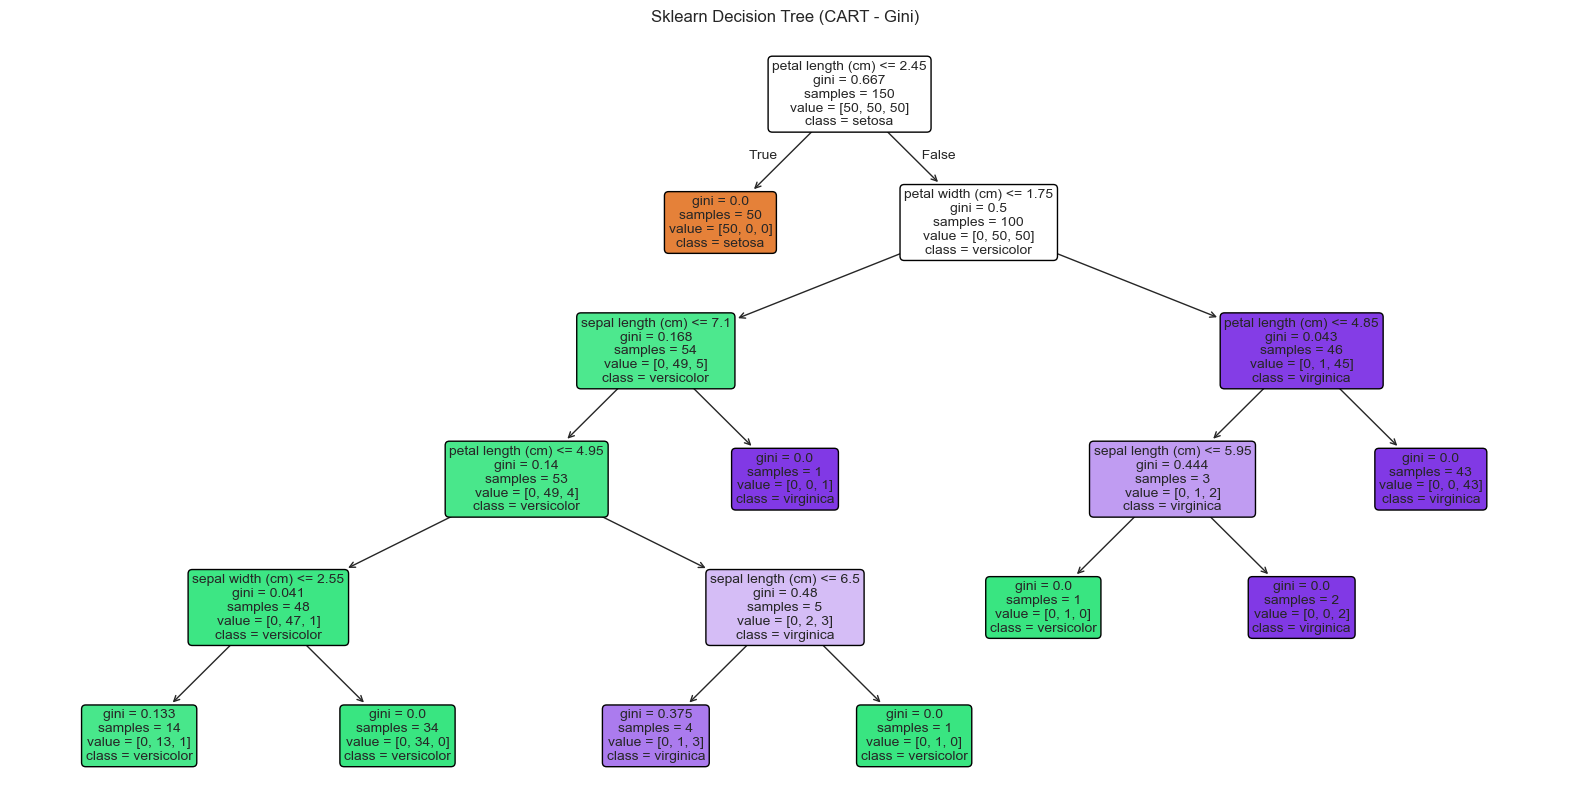

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target # Labels are already 0, 1, 2
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CART classifier
# Using n_features=2 to mimic Random Forest feature sampling

cart_tree = DecisionTreeClassifierCART(max_depth=5, n_features=2)
cart_tree.fit(X_train, y_train)

# Make predictions
y_pred = cart_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"CART 'from scratch' Accuracy: {acc * 100:.2f}%")

sklearn_cart = DecisionTreeClassifier(criterion="gini", max_depth=5, max_features=2, random_state=123)
sklearn_cart.fit(X, y)
sklearn_pred = sklearn_cart.predict(X_test)
sklearn_acc = accuracy_score(y_test, sklearn_pred)
print(f"Sklearn CART Accuracy: {sklearn_acc * 100:.2f}%")

plt.figure(figsize=(20, 10)) # Adjust figure size as needed
plot_tree(
    sklearn_cart,                  # The decision tree model
    feature_names=feature_names,   # Names of features
    class_names=class_names,       # Names of target classes
    filled=True,                   # Color nodes by majority class
    rounded=True,                  # Use rounded node boxes
    fontsize=10                    # Font size for text
)
plt.title("Sklearn Decision Tree (CART - Gini)")
plt.show()

##### Regression

In [19]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None

In [20]:
class DecisionTreeRegressorCART:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        total_features = X.shape[1]
        self.n_features = total_features if self.n_features is None else min(total_features, self.n_features)
        self.root = self._grow_tree(X, y, )
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape

        current_variance = self._variance(y) if len(y) > 0 else 0

        if (depth >= self.max_depth or
            current_variance == 0 or
            n_samples < self.min_samples_split):
            leaf_value = np.mean(y) if len(y) > 0 else 0
            return Node(value=leaf_value)
        
        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        best_feature, best_threshold, best_reduction = self._best_split(X, y, feat_idxs)

        if best_reduction == 0:
            leaf_value = np.mean(y) if len(y) > 0 else 0
            return Node(value=leaf_value)
        
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            leaf_value = np.mean(y) if len(y) > 0 else 0
            return Node(value=leaf_value)
        
        left_child = self._grow_tree(X[left_idxs], y[left_idxs], depth+1)
        right_child = self._grow_tree(X[right_idxs], y[right_idxs], depth+1)

        return Node(best_feature, best_threshold, left_child, right_child)

    def _variance(self, y):
        if len(y) <= 1:
            return 0
        return np.var(y)
    
    def _calculate_variance_reduction(self, y, X_column, threshold):
        parent_variance = self._variance(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        var_l, var_r = self._variance(y[left_idxs]), self._variance(y[right_idxs])

        weighted_child_variance = (n_l / n) * var_l + (n_r / n) * var_r

        variance_reduction = parent_variance - weighted_child_variance
        return variance_reduction

    def _best_split(self, X, y, feat_idxs):
        best_reduction = 0.0
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            unique_vals = np.unique(X_column)
            if len(unique_vals) <= 1:
                continue
            thresholds = (unique_vals[:-1] + unique_vals[1:]) / 2.0

            for threshold in thresholds:
                reduction = self._calculate_variance_reduction(y, X_column, threshold)

                if reduction > best_reduction:
                    best_reduction = reduction
                    split_idx = feat_idx
                    split_threshold = threshold
            
        return split_idx, split_threshold, best_reduction

    def _split(self, X_column, threshold):
        left_idxs = np.where(X_column <= threshold)[0]
        right_idxs = np.where(X_column > threshold)[0]

        return left_idxs, right_idxs
    
    def predict(self, X):
        X = np.array(X)
        if self.root is None:
            raise RuntimeError("Tree not trained. Call fit first.")
        return np.array([self._traverse_tree(x, self.root) for x in X]) # x is a row
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        # Follow the split condition
        # Handle potential case where feature might be missing or non-comparable in test data x
        try:
            feature_value = x[node.feature]
            if feature_value <= node.threshold:
                return self._traverse_tree(x, node.left)
            else:
                return self._traverse_tree(x, node.right)
        except (IndexError, TypeError):
             # Fallback: if feature is missing or cannot be compared,
             # we might return the mean of the current node's training samples
             # For simplicity here, let's traverse both and average, or just return node's training mean (if stored)
             # A simple fallback is to just predict based on which child has more data,
             # but the most robust would require storing node means during training.
             # Let's return the average prediction of children for now (crude fallback)
             left_pred = self._traverse_tree(x, node.left) if node.left else 0
             right_pred = self._traverse_tree(x, node.right) if node.right else 0
             # Avoid division by zero if both children somehow dont lead to leaves
             count = (1 if node.left else 0) + (1 if node.right else 0)
             return (left_pred + right_pred) / count if count > 0 else 0

CART Regression 'from scratch' MSE: 0.0464
Sklearn CART Regression MSE: 0.0464


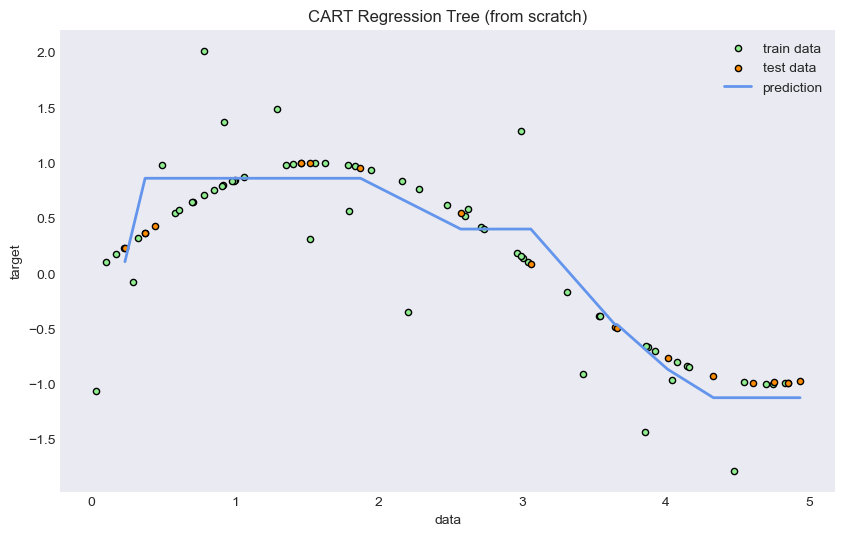

In [21]:
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

cart_reg = DecisionTreeRegressorCART(max_depth=3, min_samples_split=5)
cart_reg.fit(X_train, y_train)

y_pred = cart_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"CART Regression 'from scratch' MSE: {mse:.4f}")

sklearn_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=3, min_samples_split=5, random_state=123)
sklearn_reg.fit(X_train, y_train)
sklearn_pred = sklearn_reg.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
print(f"Sklearn CART Regression MSE: {sklearn_mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="lightgreen", label="train data")
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="test data")
sort_idx = np.argsort(X_test.flatten())
plt.plot(X_test[sort_idx], y_pred[sort_idx], color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("CART Regression Tree (from scratch)")
plt.legend()
plt.show()